In [1]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              32
On-line CPU(s) list: 0-31
Thread(s) per core:  2
Core(s) per socket:  8
Socket(s):           2
NUMA node(s):        2
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz
Stepping:            2
CPU MHz:             2600.089
CPU max MHz:         3200.0000
CPU min MHz:         1200.0000
BogoMIPS:            4800.16
Virtualization:      VT-x
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            20480K
NUMA node0 CPU(s):   0-7,16-23
NUMA node1 CPU(s):   8-15,24-31
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, get_context

import time
from tqdm import tqdm

def logistic_map(r: float, n_iter: int, x0: float) -> np.array:
    x = np.zeros(n_iter)
    x[0] = x0

    for i in range(1, n_iter):
        x[i] = r * x[i-1] * (1 - x[i-1])

    return x

def parallel_bifurcation_map(r_values: np.array, n_iter: int, x0: float, num_processes: int) -> np.array:
    pool = Pool(processes=num_processes)
    results = [pool.apply_async(logistic_map, (r, n_iter, x0)) for r in r_values]
    output = [result.get() for result in results]

    return np.array(output)

r_values = np.linspace(2.4, 4.0, 1000)
n_iter = 10000
x0 = 0.5
num_processes = 10


In [3]:
times = []
for process_count in tqdm(range(1, num_processes + 1)):
    start = time.time()
    parallel_bifurcation_map(r_values, n_iter, x0, process_count)
    end = time.time()
    execution_time = end - start
    times.append(execution_time)

100%|██████████| 10/10 [01:59<00:00, 11.93s/it]


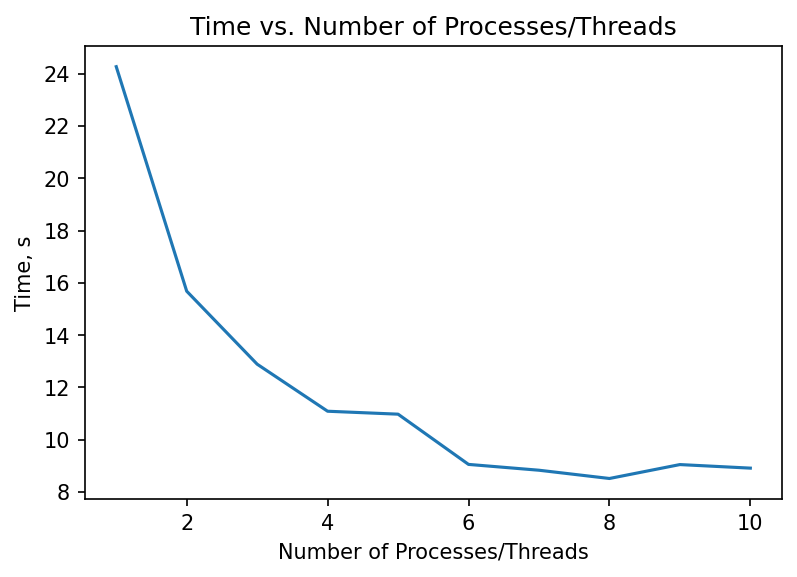

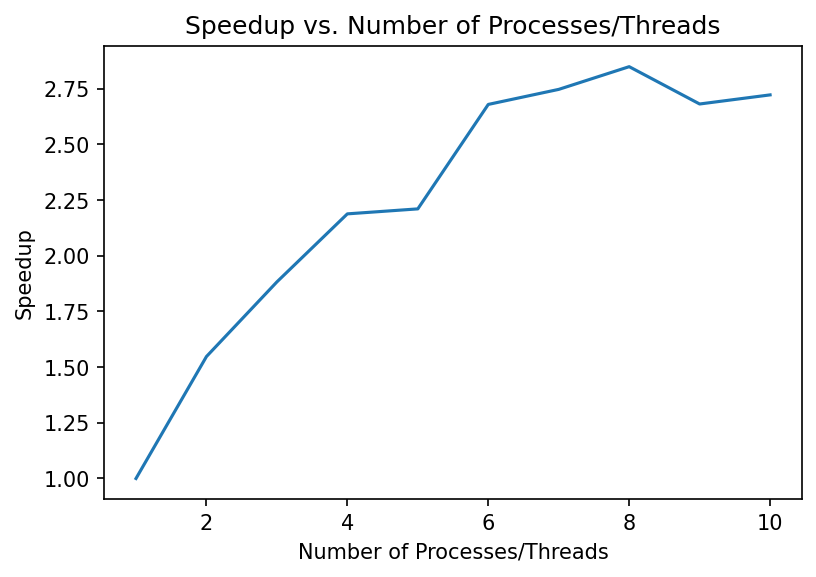

In [4]:
plt.figure(dpi=150)
plt.plot(range(1, num_processes + 1), times)
plt.xlabel('Number of Processes/Threads')
plt.ylabel('Time, s')
plt.title('Time vs. Number of Processes/Threads')
plt.show()

plt.figure(dpi=150)
plt.plot(range(1, num_processes + 1), [times[0]/x for x in times])
plt.xlabel('Number of Processes/Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Processes/Threads')
plt.show()